# Carga y limpieza de datos meteorológicos

### Todos los datos utilizados en este notebook fueros extraidos y descargados desde la pagina oficial de la direccion meteorologica de Chile - servicios climaticos, dejo el link a continuacion, es necesario registrarse para poder acceder a la pagina
 1. https://climatologia.meteochile.gob.cl/application
 2. https://climatologia.meteochile.gob.cl/application/historico/datosDescarga/330020



In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

#### Los parametros que descargamos desde la pagina de la DMC fueron, temperatura a cada instante del dia. temperatura maxima y minima registrada en un dia durante un periodo de 11 años(2015-2025)

In [52]:
def procesar_dataframe(ruta_archivo, nombre_variable):
    """
    Carga un archivo CSV, separa la columna de datos, renombra las columnas
    y convierte la columna 'Instante' a formato de fecha y hora.
    """
    # Cargar el dataframe desde el archivo
    df = pd.read_csv(ruta_archivo, header=None)
    df_split = df.iloc[:, 0].str.split(';', expand=True)
    df_procesado = df_split.iloc[:, 0:3]
    df_procesado.columns = ['CodigoNacional', 'Instante', nombre_variable]
    
    # Convertir la columna 'Instante' a formato datetime
    df_procesado['Instante'] = pd.to_datetime(df_procesado['Instante'], errors='coerce')
    
    # Convertir la columna de valores a tipo numérico
    df_procesado[nombre_variable] = pd.to_numeric(df_procesado[nombre_variable], errors='coerce')
    
    return df_procesado
    
# Rango de años de tus datos
años = range(2015, 2026) 

# Listas para guardar los dataframes procesados
lista_temp = []
lista_max_temp = []
lista_min_temp = []

for año in años:
    # Procesar archivo de Temperatura
    ruta_temp = f"../data/raw/330020_{año}_Temperatura_.csv"
    df_temp = procesar_dataframe(ruta_temp, 'Temperatura')
    lista_temp.append(df_temp)
    print(f"-> Procesado: {ruta_temp}")

    # Procesar archivo de Temperatura Máxima
    ruta_max = f"../data/raw/330020_{año}_TMaxima_.csv"
    df_max = procesar_dataframe(ruta_max, 'T_Maxima')
    lista_max_temp.append(df_max)
    print(f"-> Procesado: {ruta_max}")

    # Procesar archivo de Temperatura Mínima
    ruta_min = f"../data/raw/330020_{año}_TMinima_.csv"
    df_min = procesar_dataframe(ruta_min, 'T_Minima')
    lista_min_temp.append(df_min)
    print(f"-> Procesado: {ruta_min}")

# Concatenar todos los dataframes de cada tipo
temp_df = pd.concat(lista_temp, ignore_index=True) 
max_temp_df = pd.concat(lista_max_temp, ignore_index=True)
min_temp_df = pd.concat(lista_min_temp, ignore_index=True) 

# Unir los dataframes en uno solo usando 'Instante' y 'CodigoNacional' como clave
final_df = temp_df
final_df = pd.merge(final_df, max_temp_df, on=['CodigoNacional', 'Instante'], how='outer')
final_df = pd.merge(final_df, min_temp_df, on=['CodigoNacional', 'Instante'], how='outer')

# Ordenar los datos por fecha y limpiar filas vacías
final_df = final_df.sort_values(by='Instante').reset_index(drop=True)
final_df.dropna(how='all', inplace=True)

# Guardar el dataframe consolidado en un nuevo archivo CSV
final_df.to_csv("../data/processed/datos_meteorologicos_consolidados.csv", index=False)
print("Los datos combinados han sido guardados en 'datos_meteorologicos_consolidados.csv'")

# Mostrar las primeras filas del dataframe final
print("\n--- Muestra de los datos combinados ---")
display(final_df.head())

display(final_df.tail())

# Mostrar información del dataframe final
print("\n--- Información del dataframe final ---")
final_df.info()

C:\Users\corre\AppData\Local\Temp\ipykernel_10208\1682651541.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_procesado['Instante'] = pd.to_datetime(df_procesado['Instante'], errors='coerce')
C:\Users\corre\AppData\Local\Temp\ipykernel_10208\1682651541.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_procesado['Instante'] = pd.to_datetime(df_procesado['Instante'], errors='coerce')
C:\Users\corre\AppData\Local\Temp\ipykernel_10208\1682651541.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

-> Procesado: ../data/raw/330020_2015_Temperatura_.csv
-> Procesado: ../data/raw/330020_2015_TMaxima_.csv
-> Procesado: ../data/raw/330020_2015_TMinima_.csv
-> Procesado: ../data/raw/330020_2016_Temperatura_.csv
-> Procesado: ../data/raw/330020_2016_TMaxima_.csv
-> Procesado: ../data/raw/330020_2016_TMinima_.csv
-> Procesado: ../data/raw/330020_2017_Temperatura_.csv
-> Procesado: ../data/raw/330020_2017_TMaxima_.csv
-> Procesado: ../data/raw/330020_2017_TMinima_.csv
-> Procesado: ../data/raw/330020_2018_Temperatura_.csv
-> Procesado: ../data/raw/330020_2018_TMaxima_.csv
-> Procesado: ../data/raw/330020_2018_TMinima_.csv


C:\Users\corre\AppData\Local\Temp\ipykernel_10208\1682651541.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_procesado['Instante'] = pd.to_datetime(df_procesado['Instante'], errors='coerce')
C:\Users\corre\AppData\Local\Temp\ipykernel_10208\1682651541.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_procesado['Instante'] = pd.to_datetime(df_procesado['Instante'], errors='coerce')
C:\Users\corre\AppData\Local\Temp\ipykernel_10208\1682651541.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

-> Procesado: ../data/raw/330020_2019_Temperatura_.csv
-> Procesado: ../data/raw/330020_2019_TMaxima_.csv
-> Procesado: ../data/raw/330020_2019_TMinima_.csv
-> Procesado: ../data/raw/330020_2020_Temperatura_.csv
-> Procesado: ../data/raw/330020_2020_TMaxima_.csv
-> Procesado: ../data/raw/330020_2020_TMinima_.csv
-> Procesado: ../data/raw/330020_2021_Temperatura_.csv
-> Procesado: ../data/raw/330020_2021_TMaxima_.csv
-> Procesado: ../data/raw/330020_2021_TMinima_.csv
-> Procesado: ../data/raw/330020_2022_Temperatura_.csv
-> Procesado: ../data/raw/330020_2022_TMaxima_.csv
-> Procesado: ../data/raw/330020_2022_TMinima_.csv
-> Procesado: ../data/raw/330020_2023_Temperatura_.csv
-> Procesado: ../data/raw/330020_2023_TMaxima_.csv
-> Procesado: ../data/raw/330020_2023_TMinima_.csv


C:\Users\corre\AppData\Local\Temp\ipykernel_10208\1682651541.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_procesado['Instante'] = pd.to_datetime(df_procesado['Instante'], errors='coerce')
C:\Users\corre\AppData\Local\Temp\ipykernel_10208\1682651541.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_procesado['Instante'] = pd.to_datetime(df_procesado['Instante'], errors='coerce')
C:\Users\corre\AppData\Local\Temp\ipykernel_10208\1682651541.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

-> Procesado: ../data/raw/330020_2024_Temperatura_.csv
-> Procesado: ../data/raw/330020_2024_TMaxima_.csv
-> Procesado: ../data/raw/330020_2024_TMinima_.csv
-> Procesado: ../data/raw/330020_2025_Temperatura_.csv
-> Procesado: ../data/raw/330020_2025_TMaxima_.csv
-> Procesado: ../data/raw/330020_2025_TMinima_.csv
Los datos combinados han sido guardados en 'datos_meteorologicos_consolidados.csv'

--- Muestra de los datos combinados ---


,CodigoNacional,Instante,Temperatura,T_Maxima,T_Minima
0,330020,2015-01-01 00:00:00,21.3,30.2,14.6
1,330020,2015-01-01 01:00:00,19.4,NaN,NaN
2,330020,2015-01-01 02:00:00,17.9,NaN,NaN
3,330020,2015-01-01 03:00:00,17.1,NaN,NaN
4,330020,2015-01-01 04:00:00,17.0,NaN,NaN


,CodigoNacional,Instante,Temperatura,T_Maxima,T_Minima
95731,CodigoNacional,NaT,NaN,NaN,NaN
95732,CodigoNacional,NaT,NaN,NaN,NaN
95733,CodigoNacional,NaT,NaN,NaN,NaN
95734,CodigoNacional,NaT,NaN,NaN,NaN
95735,CodigoNacional,NaT,NaN,NaN,NaN



--- Información del dataframe final ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95736 entries, 0 to 95735
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CodigoNacional  95736 non-null  object        
 1   Instante        94405 non-null  datetime64[ns]
 2   Temperatura     94376 non-null  float64       
 3   T_Maxima        3948 non-null   float64       
 4   T_Minima        3947 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 3.7+ MB


notemos que gracias a la funcion describe podemos ver que tenemos un total de 95.736 filas, las cuales corresponden a registros hora a hora desde el 01/01/2015 hasta aproximadamente el 12/10/2025 y unos cuantos datos mas que por lo que podemos ver son todos NaN por lo cual es necesario limpiar y filtrar estsos datos.

In [53]:
final_df.iloc[94404]

CodigoNacional                 330020
Instante          2025-12-10 00:00:00
Temperatura                       NaN
T_Maxima                         27.0
T_Minima                          5.9
Name: 94404, dtype: object

In [54]:
final_df.iloc[94405]

CodigoNacional    CodigoNacional
Instante                     NaT
Temperatura                  NaN
T_Maxima                     NaN
T_Minima                     NaN
Name: 94405, dtype: object

In [55]:
final_df.iloc[94406]

CodigoNacional    CodigoNacional
Instante                     NaT
Temperatura                  NaN
T_Maxima                     NaN
T_Minima                     NaN
Name: 94406, dtype: object

In [56]:
final_df.iloc[94408]

CodigoNacional    CodigoNacional
Instante                     NaT
Temperatura                  NaN
T_Maxima                     NaN
T_Minima                     NaN
Name: 94408, dtype: object

Notemos que desde la fila 94.405 todas las columnas tienen datos de tipo Nan por lo tanto podriamos elimir todos los datos desde la fila 94406 en adelante

In [57]:
final_df.iloc[94403]

CodigoNacional                 330020
Instante          2025-12-09 00:00:00
Temperatura                       NaN
T_Maxima                         26.2
T_Minima                          7.1
Name: 94403, dtype: object

In [58]:
final_df.iloc[94402]

CodigoNacional                 330020
Instante          2025-12-08 00:00:00
Temperatura                       NaN
T_Maxima                         21.5
T_Minima                          8.1
Name: 94402, dtype: object

In [59]:
final_df.iloc[94401]

CodigoNacional                 330020
Instante          2025-12-07 00:00:00
Temperatura                       NaN
T_Maxima                         19.7
T_Minima                          0.6
Name: 94401, dtype: object

Notemos como esta filas muestran datos que supuestamenete corresponden al mes de diciembre, lo cual es imposible dado que estamos recien en octubre de 2025 por lo cual es necesario asegurar que nuestro datos son correctos por lo tanto buscamos en el dataframe el ultimo dato correspondiente a octubre

In [60]:
final_df.iloc[94379]

CodigoNacional                 330020
Instante          2025-10-14 00:00:00
Temperatura                      19.5
T_Maxima                          NaN
T_Minima                          NaN
Name: 94379, dtype: object

es en esta fila que nosotros debemos acortar los datos ya que todos los datos ingresados luego de esta fila podrian producirnos problemas a futuro por ser erroneos

In [61]:
indices_para_eliminar = final_df.iloc[94379:].index
final_df.drop(indices_para_eliminar, inplace=True)

verificamos los ultimos datos del dataframe

In [62]:
final_df.tail(25)

,CodigoNacional,Instante,Temperatura,T_Maxima,T_Minima
94354,330020,2025-10-12 23:00:00,21.0,NaN,NaN
94355,330020,2025-10-13 00:00:00,18.9,27.7,8.2
94356,330020,2025-10-13 01:00:00,17.2,NaN,NaN
94357,330020,2025-10-13 02:00:00,15.9,NaN,NaN
94358,330020,2025-10-13 03:00:00,14.3,NaN,NaN
94359,330020,2025-10-13 04:00:00,12.3,NaN,NaN
94360,330020,2025-10-13 05:00:00,11.9,NaN,NaN
94361,330020,2025-10-13 06:00:00,10.7,NaN,NaN
94362,330020,2025-10-13 07:00:00,9.1,NaN,NaN
94363,330020,2025-10-13 08:00:00,8.6,NaN,NaN


una vez ya tenemos nuestro df libre de datos erroneos en la columna de temperatura, debemos agrupar los datos por dia, creando asi, una columna con la temperatura promedio por dia, una columan con la temparatura maxima registrada ese dia y una con la minima

In [63]:
final_df['Instante'] = pd.to_datetime(final_df['Instante'])

df_diario_temp = final_df.groupby(final_df['Instante'].dt.date).agg(
    # Valores principales que podrían tener NaNs
    Temp_Promedio=('Temperatura', 'mean'),
    Temp_Maxima=('T_Maxima', 'max'),
    Temp_Minima=('T_Minima', 'min'),
    
    # Valores de respaldo calculados desde la columna 'Temperatura'
    Max_Temp_Respaldo=('Temperatura', 'max'),
    Min_Temp_Respaldo=('Temperatura', 'min')
)

# 2. Rellenar los valores NaN
# Si 'Temp_Maxima' es NaN, usa el valor de 'Max_Temp_Respaldo' de ese día
df_diario_temp['Temp_Maxima'].fillna(df_diario_temp['Max_Temp_Respaldo'], inplace=True)

# Si 'Temp_Minima' es NaN, usa el valor de 'Min_Temp_Respaldo' de ese día
df_diario_temp['Temp_Minima'].fillna(df_diario_temp['Min_Temp_Respaldo'], inplace=True)


# 3. Eliminar las columnas de respaldo que ya no necesitamos
df_diario = df_diario_temp.drop(columns=['Max_Temp_Respaldo', 'Min_Temp_Respaldo'])

# 4. Convertir el índice de fecha a una columna y renombrarla
df_diario = df_diario.reset_index()
df_diario = df_diario.rename(columns={'Instante': 'Fecha'})

# --- Mostramos el resultado ---
print("--- DataFrame diario con valores NaN rellenados ---")
display(df_diario.head())

print("\n--- Información del nuevo DataFrame ---")
# Fíjate si la cantidad de 'Non-Null' ahora es la misma en todas las columnas
df_diario.info()

--- DataFrame diario con valores NaN rellenados ---


C:\Users\corre\AppData\Local\Temp\ipykernel_10208\3406182561.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_diario_temp['Temp_Maxima'].fillna(df_diario_temp['Max_Temp_Respaldo'], inplace=True)
C:\Users\corre\AppData\Local\Temp\ipykernel_10208\3406182561.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

,Fecha,Temp_Promedio,Temp_Maxima,Temp_Minima
0,2015-01-01,21.150000,30.2,14.6
1,2015-01-02,22.408333,32.6,14.1
2,2015-01-03,22.991667,29.8,12.1
3,2015-01-04,23.950000,30.6,10.5
4,2015-01-05,22.854167,19.4,10.9



--- Información del nuevo DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3939 entries, 0 to 3938
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Fecha          3939 non-null   object 
 1   Temp_Promedio  3938 non-null   float64
 2   Temp_Maxima    3939 non-null   float64
 3   Temp_Minima    3938 non-null   float64
dtypes: float64(3), object(1)
memory usage: 123.2+ KB


Notemos que todavia exiten una fila con datos nulos, por lo cual toca buscarla, evaluarla y finalmente eliminarla

In [64]:
df_diario.tail(25)

,Fecha,Temp_Promedio,Temp_Maxima,Temp_Minima
3914,2025-09-19,14.070833,25.0,5.4
3915,2025-09-20,11.525000,16.7,6.2
3916,2025-09-21,11.275000,17.3,7.1
3917,2025-09-22,11.720833,24.1,3.1
3918,2025-09-23,14.595833,25.5,5.0
3919,2025-09-24,17.337500,29.3,7.4
3920,2025-09-25,17.266667,26.7,9.9
3921,2025-09-26,10.412500,15.7,9.8
3922,2025-09-27,10.425000,22.0,3.0
3923,2025-09-28,14.195833,25.2,5.8


In [65]:
filas_con_nulos = df_diario[df_diario['Temp_Minima'].isnull()]
print(filas_con_nulos)

          Fecha  Temp_Promedio  Temp_Maxima  Temp_Minima
352  2015-12-19            NaN         25.8          NaN


In [66]:
df_diario.drop(352, inplace=True)

In [67]:
df_diario.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3938 entries, 0 to 3938
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Fecha          3938 non-null   object 
 1   Temp_Promedio  3938 non-null   float64
 2   Temp_Maxima    3938 non-null   float64
 3   Temp_Minima    3938 non-null   float64
dtypes: float64(3), object(1)
memory usage: 153.8+ KB


Finalmente tenemos nuestro dataframe con la temperatura promedio, maxima y minima de cada dia desde el 01/01/2015 hasta el 13/10/2025, por lo cual ahora guardamos el dataframe en un nuevo archivo csv, con el fin de poder trabajarlo mejor junto con los demas datos para nuestro proyecto

In [68]:
df_diario.to_csv("../data/processed/datos_meteorologicos_semi-limpios.csv", index=False)

## Trabajando con los datos meteorológicos semi-limpios

In [69]:
ruta = "../data/processed/datos_meteorologicos_semi-limpios.csv"
df_temperaturas = pd.read_csv(ruta)
display(df_temperaturas.head())
display(df_temperaturas.tail())

,Fecha,Temp_Promedio,Temp_Maxima,Temp_Minima
0,2015-01-01,21.150000,30.2,14.6
1,2015-01-02,22.408333,32.6,14.1
2,2015-01-03,22.991667,29.8,12.1
3,2015-01-04,23.950000,30.6,10.5
4,2015-01-05,22.854167,19.4,10.9


,Fecha,Temp_Promedio,Temp_Maxima,Temp_Minima
3933,2025-10-09,18.733333,22.3,7.6
3934,2025-10-10,16.650000,22.0,10.9
3935,2025-10-11,14.312500,22.4,8.9
3936,2025-10-12,15.658333,26.5,5.9
3937,2025-10-13,17.358333,27.7,8.2


In [70]:
df_temperaturas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3938 entries, 0 to 3937
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Fecha          3938 non-null   object 
 1   Temp_Promedio  3938 non-null   float64
 2   Temp_Maxima    3938 non-null   float64
 3   Temp_Minima    3938 non-null   float64
dtypes: float64(3), object(1)
memory usage: 123.2+ KB


Notemos que el dataframe no contiene datos nulos y el tipo de dato es correcto para cada columna

In [71]:
df_temperaturas.describe()

,Temp_Promedio,Temp_Maxima,Temp_Minima
count,3938.000000,3938.000000,3938.000000
mean,15.459041,23.959396,8.560386
std,5.209217,6.540864,4.186961
min,3.520833,7.200000,-3.000000
25%,11.033333,18.600000,5.500000
50%,15.345833,24.600000,8.900000
75%,20.110417,29.500000,12.000000
max,26.650000,38.300000,19.500000


In [72]:
nulos = df_temperaturas.isnull().sum()
print(nulos)

Fecha            0
Temp_Promedio    0
Temp_Maxima      0
Temp_Minima      0
dtype: int64


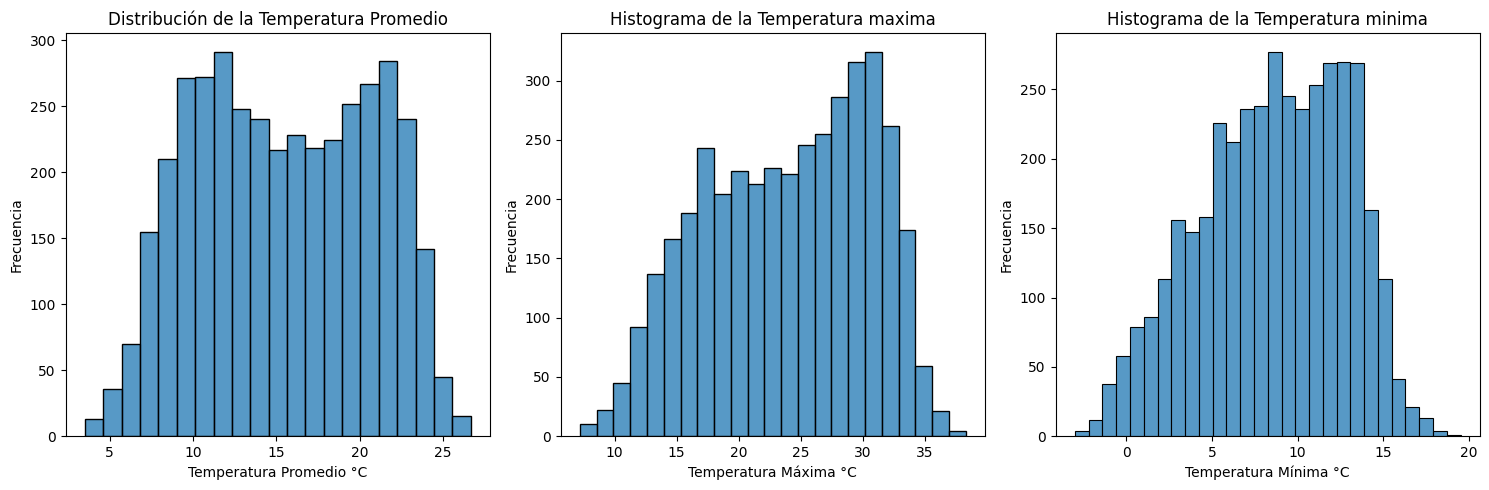

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df_temperaturas["Temp_Promedio"], ax=axes[0])
axes[0].set_title("Distribución de la Temperatura Promedio")
axes[0].set_xlabel("Temperatura Promedio °C")
axes[0].set_ylabel("Frecuencia")

sns.histplot(df_temperaturas["Temp_Maxima"], ax=axes[1])
axes[1].set_title("Histograma de la Temperatura maxima")
axes[1].set_xlabel("Temperatura Máxima °C")
axes[1].set_ylabel("Frecuencia")

sns.histplot(df_temperaturas["Temp_Minima"], ax=axes[2])
axes[2].set_title("Histograma de la Temperatura minima")
axes[2].set_xlabel("Temperatura Mínima °C")
axes[2].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

               Temp_Promedio  Temp_Maxima  Temp_Minima
Temp_Promedio       1.000000     0.555620     0.531517
Temp_Maxima         0.555620     1.000000     0.643031
Temp_Minima         0.531517     0.643031     1.000000


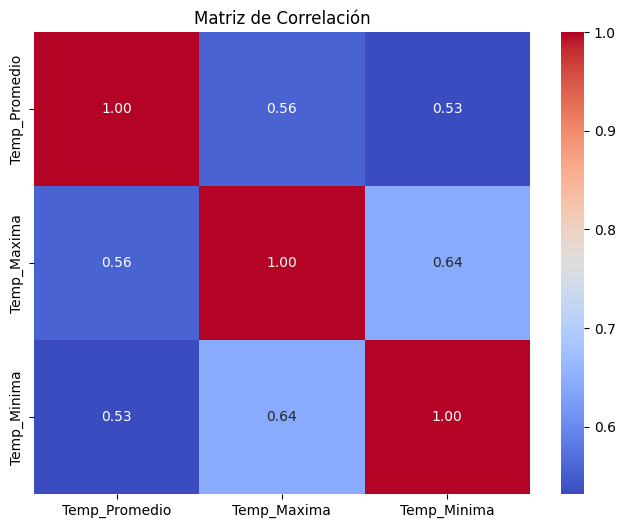

In [74]:
columnas_numericas = df_temperaturas[['Temp_Promedio', 'Temp_Maxima', 'Temp_Minima']]
corr = columnas_numericas.corr()
print(corr)

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()

Las temperaturas máxima y mínima parecen estar relacionadas, pero la temperatura promedio tiene una relación más moderada tanto con la máxima como con la mínima.

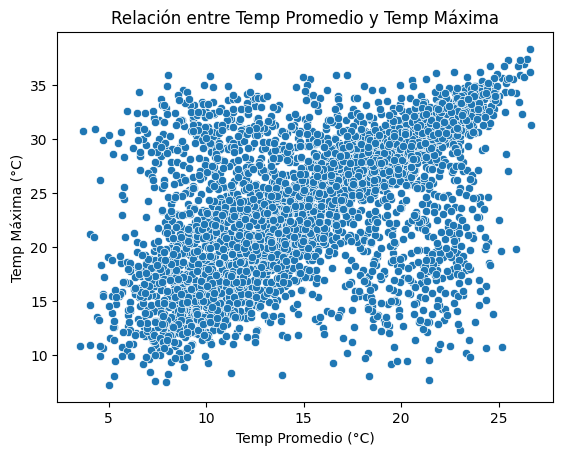

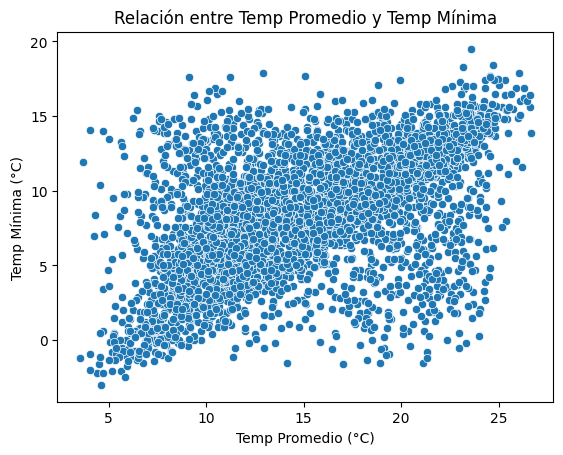

In [75]:
sns.scatterplot(x=df_temperaturas["Temp_Promedio"], y=df_temperaturas["Temp_Maxima"])
plt.title("Relación entre Temp Promedio y Temp Máxima")
plt.xlabel("Temp Promedio (°C)")
plt.ylabel("Temp Máxima (°C)")
plt.show()

# Relación entre Temp_Promedio y Temp_Minima
sns.scatterplot(x=df_temperaturas["Temp_Promedio"], y=df_temperaturas["Temp_Minima"])
plt.title("Relación entre Temp Promedio y Temp Mínima")
plt.xlabel("Temp Promedio (°C)")
plt.ylabel("Temp Mínima (°C)")
plt.show()

Ambos gráficos demuestran que tanto la temperatura máxima como la mínima de un día están directamente relacionadas con la temperatura promedio de ese mismo día. Si la temperatura promedio sube, es muy probable que tanto la máxima como la mínima también lo hagan.

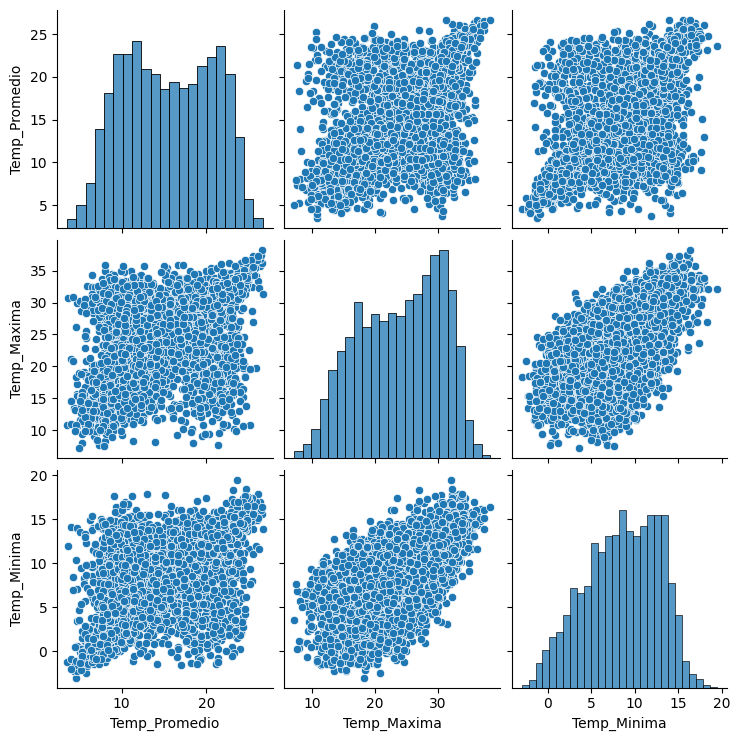

In [76]:
sns.pairplot(df_temperaturas[["Temp_Promedio", "Temp_Maxima", "Temp_Minima"]])
plt.show()

Estos gráficos nos permiten concluir que las tres variables de temperatura (promedio, máxima y mínima) están fuertemente correlacionadas entre sí. Cuando una de ellas aumenta, las otras dos también tienden a hacerlo.

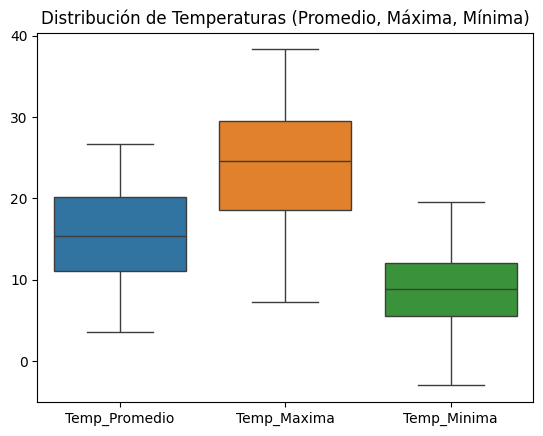

In [77]:
sns.boxplot(data=df_temperaturas[["Temp_Promedio", "Temp_Maxima", "Temp_Minima"]])
plt.title("Distribución de Temperaturas (Promedio, Máxima, Mínima)")
plt.show()

El gráfico de cajas muestra claramente cómo se comparan las distribuciones de las temperaturas. La Temp_Maxima es la más variable y alta, mientras que la Temp_Minima es la menos variable y más baja. La Temp_Promedio se sitúa, como es de esperar, en una posición intermedia en cuanto a valor y dispersión

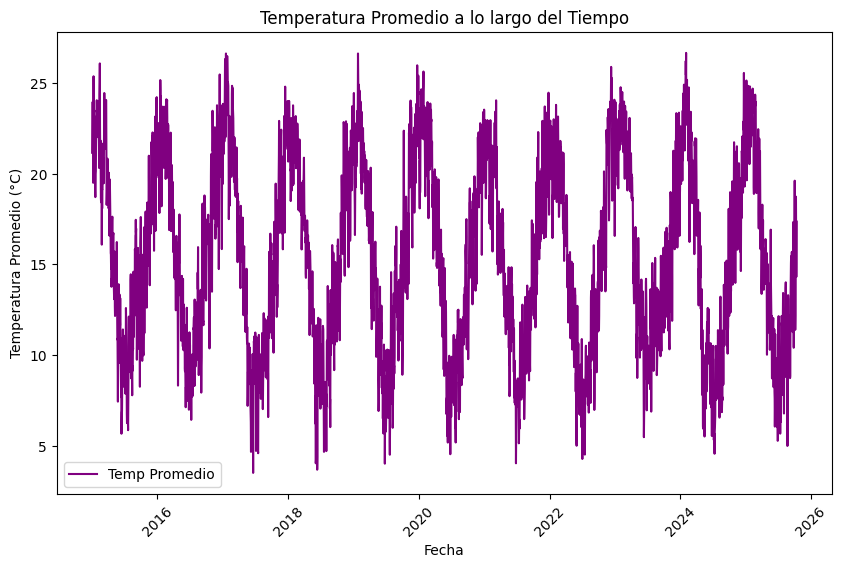

In [78]:
df_temperaturas["Fecha"] = pd.to_datetime(df_temperaturas["Fecha"])

# Gráfico de línea para visualizar la temperatura promedio a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(df_temperaturas["Fecha"], df_temperaturas["Temp_Promedio"], label="Temp Promedio", color="purple")
plt.title("Temperatura Promedio a lo largo del Tiempo")
plt.xlabel("Fecha")
plt.ylabel("Temperatura Promedio (°C)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

El gráfico ilustra de manera efectiva el ciclo estacional de las temperaturas en la ubicación de donde provienen los datos. Muestra una clara y predecible fluctuación anual, subiendo en verano y bajando en invierno, un comportamiento típico del clima en zonas con estaciones bien definidas como lo es la Región Metropolitana